In [3]:
include("..\\Model_Reduction_Dev.jl")
include("..\\AnalysisToolbox_scratch_ckms.jl")

using PyPlot

function visual_test_ckms(P,l,nfft)
    d  = size(P,1)
    lp = size(P,3)
    ll = size(l,3)
    S_fun(z)    = P[:,:,1] + sum(P[:,:,i]*z^(-i+1) + P[:,:,i]'*z^(i-1) for i = 2:lp)
    S_fun_minus(z) = sum(l[:,:,i]*z^(-i+1) for i = 1:ll)
    S_fun_plus(z) = sum(l[:,:,i]'*z^(i-1) for i = 1:ll)

    Θ = 2π*(0:nfft-1)/nfft
    Z = exp.(im*Θ)
    S = complex(zeros(d,d,nfft))
    S_l = complex(zeros(d,d,nfft))
    for i = 1:nfft
        S[:,:,i] = S_fun(Z[i])
        S_l[:,:,i] = S_fun_minus(Z[i])*S_fun_plus(Z[i])
    end


    for i = 1:d
        for j = i:d
            plot(S[i,j,:], label = "S $i $j")
            plot(S_l[i,j,:], label = "S_l $i $j")
        end
    end
    legend()
end

visual_test_ckms (generic function with 1 method)

### Scalar function

In [3]:
P = zeros(1,1,2)
P[1,1,1] = 10
P[1,1,2] = 3

L = spectfact_matrix_CKMS(P)

1×1×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.000000000000001 + 0.0im

[:, :, 2] =
 0.9999999999999998 + 0.0im

In [17]:
P = zeros(1,1,2)
P[1,1,1] = 10
P[1,1,2] = 3

L, Err = spectfact_matrix_CKMS_SC(P);

i : 12


In [13]:
L

1×1×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0000000000005254 + 0.0im

[:, :, 2] =
 0.999999999999825 + 0.0im

### 2×2-Diagonal Matrix

In [32]:
P = zeros(2,2,2)
P[:,:,1] = [10 0 ; 0 84]
P[:,:,2] = [3 0; 0 38]

l = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0+0.0im      0.0+0.0im
 0.0-0.0im  7.73877+0.0im

[:, :, 2] =
 1.0+0.0im      0.0+0.0im
 0.0+0.0im  4.91034+0.0im

In [26]:
ρ = (-42 + sqrt(42^2 - 38^2))/38

(sqrt(-38/ρ),-ρ*sqrt(-38/ρ))

(7.738768882709854, 4.910341757963664)

In [30]:
P = zeros(2,2,2)
P[:,:,1] = [10 0 ; 0 84]
P[:,:,2] = [3 0; 0 38]

L, Err = spectfact_matrix_CKMS_SC(P);
L

i : 29


2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 3.0+0.0im      0.0+0.0im
 0.0-0.0im  7.73877+0.0im

[:, :, 2] =
 1.0+0.0im      0.0+0.0im
 0.0+0.0im  4.91034+0.0im

### 2×2-nondiagonal Matrix 

In [25]:
P = zeros(2,2,2)
P[:,:,1] = [174 17 ; 17 42]
P[:,:,2] = [-2 -4; -79 -8]

l_ana = zeros(2,2,2)
l_ana[:,:,1] = [1 13; 2 1]
l_ana[:,:,2] = [-2 0; -1 -6]

l_num = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 13.0+0.0im  1.0+0.0im
  1.0-0.0im  2.0+0.0im

[:, :, 2] =
  0.0+0.0im  -2.0+0.0im
 -6.0+0.0im  -1.0-0.0im

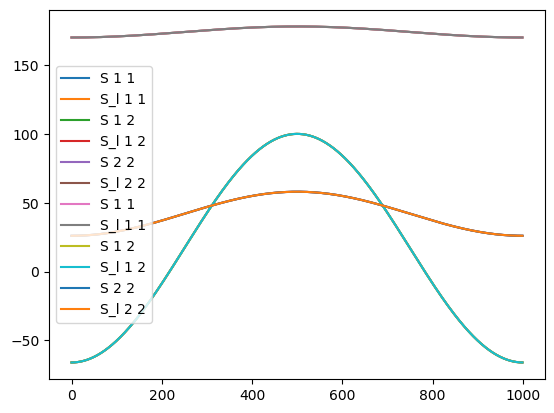

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject <matplotlib.legend.Legend object at 0x0000000034687E88>

In [26]:
nfft = 1000
visual_test_ckms(P,l_num,nfft)
visual_test_ckms(P,l_ana,nfft)

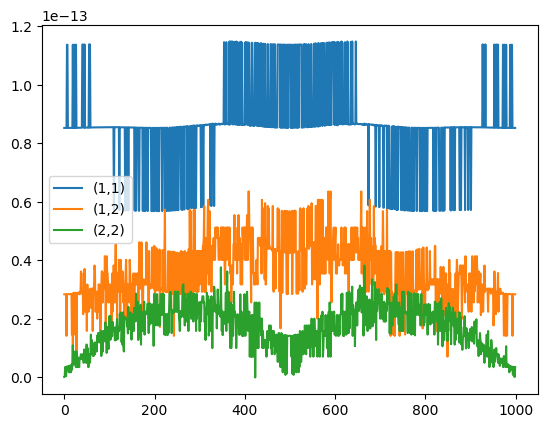

PyObject <matplotlib.legend.Legend object at 0x0000000034737E88>

In [27]:
ll_ana = size(l_ana,3)
ll_num = size(l_num,3)


S_ana_fun_minus(z) = sum(l_ana[:,:,i]*z^(-i+1) for i = 1:ll_ana)
S_num_fun_minus(z) = sum(l_num[:,:,i]*z^(-i+1) for i = 1:ll_num)

res(z) = S_ana_fun_minus(z)*S_ana_fun_minus(z^(-1))' -
            S_num_fun_minus(z)*S_num_fun_minus(z^(-1))'

d= 2; nfft = 10^3
Res = complex(zeros(d,d,nfft))
for i = 1:nfft
    Res[:,:,i] = res(exp(im*2π*i/nfft))
end

for i = 1:d
  for j = i:d
    plot(abs.(Res[i,j,:]),label = "($i,$j)")
  end
end
legend()

### 2×2-nondiagonal Matrix (from JLE)

This example is an interesting one because its determinant has two unit-cirlce double zeros, indeed the determinant of $P(z)$ is 
$$\det(P(z)) = -\dfrac{(z-1)^2(z+1)^2}{z^2}$$
Which we can check still satisfise Paley-Wiener ($\log\det P(z) \in L^1(\mathbb{T})$

In [19]:
P = zeros(2,2,2)
P[:,:,1] = [6 22; 22 84]
P[:,:,2] = [2 7; 11 38]

l_ana = zeros(2,2,2)
l_ana[:,:,1] = [2 1; 7 3]
l_ana[:,:,2] = [1 0; 5 1]

l_num = spectfact_matrix_CKMS(P)

2×2×2 Array{Complex{Float64},3}:
[:, :, 1] =
 0.744883+0.0im  2.10906+0.0im
  2.10906-0.0im  7.32076+0.0im

[:, :, 2] =
 -0.121272-0.0im  0.991122+0.0im
  0.382301-0.0im   5.08058+0.0im

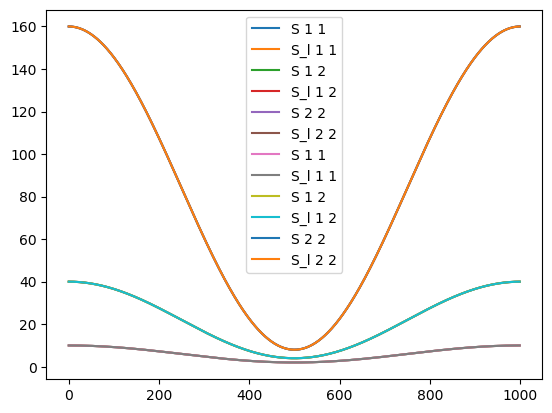

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


PyObject <matplotlib.legend.Legend object at 0x00000000343D6CC8>

In [20]:
nfft = 1000
visual_test_ckms(P,l_num,nfft)
visual_test_ckms(P,l_ana,nfft)

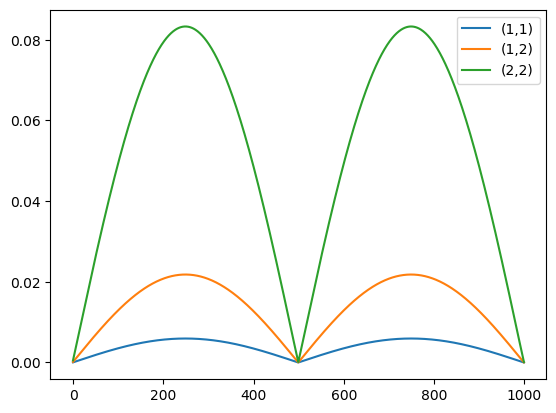

PyObject <matplotlib.legend.Legend object at 0x00000000345DDA88>

In [24]:
ll_ana = size(l_ana,3)
ll_num = size(l_num,3)


S_ana_fun_minus(z) = sum(l_ana[:,:,i]*z^(-i+1) for i = 1:ll_ana)
S_num_fun_minus(z) = sum(l_num[:,:,i]*z^(-i+1) for i = 1:ll_num)

res(z) = S_ana_fun_minus(z)*S_ana_fun_minus(z^(-1))' -
            S_num_fun_minus(z)*S_num_fun_minus(z^(-1))'

d= 2; nfft = 10^3
Res = complex(zeros(d,d,nfft))
for i = 1:nfft
    Res[:,:,i] = res(exp(im*2π*i/nfft))
end

for i = 1:d
  for j = i:d
    plot(abs.(Res[i,j,:]),label = "($i,$j)")
  end
end
legend()